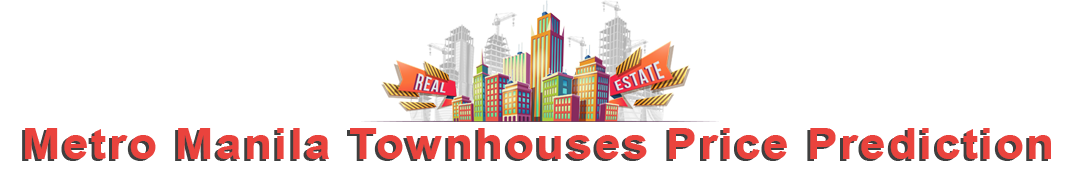

<hr style="height:1px; background-color: #690c3d">

#### &emsp;&emsp;&emsp;&emsp;&emsp;&emsp; &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; &emsp;&emsp;&emsp;&emsp; **Date:** February 15, 2021 &emsp;| &emsp; Dataset Source file: [link](https://www.kaggle.com/onlineauctions/online-auctions-dataset) 
<hr style="height:1px; background-color: #690c3d">

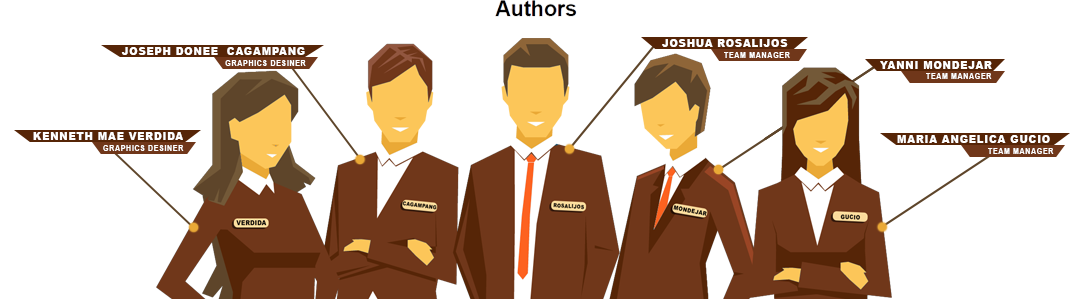

### Table of Contents
1. Problem Narrative<br>
&nbsp;&nbsp;1.1. Problem Statement <br>
&nbsp;&nbsp;1.2. Independent Variables <br>
&nbsp;&nbsp;1.3. Dependent Variables <br>
&nbsp;&nbsp;1.4. Description <br>
2. Data Preparation <br><br>
3. Data Cleaning <br>
&nbsp;&nbsp;3.1. Drop not needed column/s <br>
&nbsp;&nbsp;3.2. Check Null Values <br>
&nbsp;&nbsp;3.3. Identify unique values of the categorical columns <br>
&nbsp;&nbsp;3.4. Check for duplicates <br>
&nbsp;&nbsp;3.5. Variable Creation <br>
&nbsp;&nbsp;3.6. Convert data type <br>
&nbsp;&nbsp;3.7. Check Multicollinearity <br>
&nbsp;&nbsp;&nbsp;&nbsp;    3.7.1. Correlation Matrix <br>
&nbsp;&nbsp;&nbsp;&nbsp;    3.7.2. Variance Inflation Factor <br>
&nbsp;&nbsp;&nbsp;&nbsp;    3.7.3. Scatter Plot Matrix <br>
&nbsp;&nbsp;2.8. Check Outliers <br>
&nbsp;&nbsp;2.9. Dataset Summary <br><br>
4. Model Planning and Building <br>
&nbsp;&nbsp; 4.1. Import Libraries <br>
&nbsp;&nbsp; 4.2. Define Dependent and Independent Variables <br>
&nbsp;&nbsp; 4.3. Define Train and Test Set <br>
&nbsp;&nbsp; 4.4. Model Building <br>
&nbsp;&nbsp;&nbsp;&nbsp; 4.4.1. Multiple Linear Regression <br>
&nbsp;&nbsp;&nbsp;&nbsp; 4.4.2. Decision Tree <br>
&nbsp;&nbsp;&nbsp;&nbsp; 4.4.3. Random Forest <br>
&nbsp;&nbsp;&nbsp;&nbsp; 4.4.4. Multi Layer Perceptron Model <br>
&nbsp;&nbsp;&nbsp;&nbsp; 4.4.5. KMeans Clustering <br><br>
5. Model Evaluation<br>
&nbsp;&nbsp;&nbsp;&nbsp; 5.1. Import Libraries <br>
&nbsp;&nbsp;&nbsp;&nbsp; 5.2. Checking for Heteroscedasticity <br>
&nbsp;&nbsp;&nbsp;&nbsp; 5.3. Checking for Autocorrelation <br>
&nbsp;&nbsp;&nbsp;&nbsp; 5.4. Checking the Mean of the Residuals Equals 0 <br>
&nbsp;&nbsp;&nbsp;&nbsp; 5.5. Confidence Intervals <br>
&nbsp;&nbsp;&nbsp;&nbsp; 5.6. Remove the Insignificant Variables. <br>
&nbsp;&nbsp;&nbsp;&nbsp; 5.7. Create a Summary of the Model Output <br>
&nbsp;&nbsp;&nbsp;&nbsp; 5.8. Rerun the Model <br><br>
6. Results and Key Findings

### 1. Problem Narrative
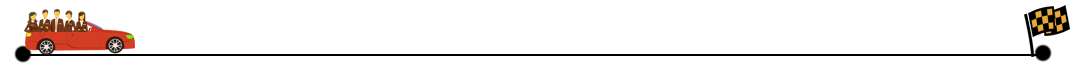

In the land of the Rising Sun, there was a man, a data analyst named Kirigaya Kazuto who married a very lovely Filipina woman named Alice. After being married for a year, Kazuto felt like his wife misses her home so he thought, “Philippines is a good place and I also liked it there. Hmm, why not live there?”
    
So, our very in love Kazuto decides to surprise his wife with his decision and searched for Townhouses on a website he found called Property24 where Real Estate Properties in Metro Manila are posted. But! Kazuto wants to know about the estimated price between 1 Million pesos to 5 Million pesos of the house based on the condition of the house he pictured on his mind. The details of the Townhouses he gathered are the location within Metro Manila, bedrooms, bathrooms, number of floors, floor area, lot area, garage, garden, pet friendly, reservation fee, price, and link where he got his data.

With this data, he decided to look for the possible price of the house available for them depending on the condition of the house that he wants.

#### Problem Statement
Kazuto wants to create a prediction model where he can predict the estimated price between 1 Million pesos to 5 Million pesos of the house based on the condition of the house he pictured on his mind.

#### Independent Variables

- Location – Location inside Metro Manila
- Bedrooms – total number of bedrooms available
- Bathrooms – total number of bathrooms available
- Floor – number of floors
- Floors Area – total number of floor area
- Lot Area – total number of lot area
- Garage – total number of garages
- Garden – if garden is available or not
- Pet Friendly – if the house is pet friendly or not
- Reservation Fee – reservation fee amount
- Link – link where the data was scrapped

#### Dependent Variable
- Price – total price for the house

#### Description
The dataset contains 4,745 data points collected from a Real Estate Market Place Website called Property24.

<br>

### 2. Data Preparation
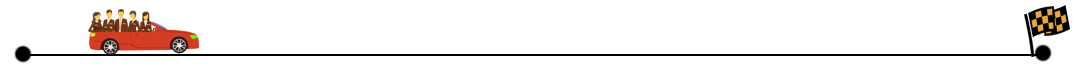

In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns 
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [4]:
# read the dataset
dataset_df = pd.read_csv('property24.csv')

# display the first five rows
display(dataset_df.head())

,Type,Location,Bedrooms,Bathrooms,Floor,Floors Area,Lot Area,Garage,Garden,Pet Friendly,Reservation Fee,Price,Link
0,House and Lot,Las Pinas City,2,1,2,67.0,55.0,1,yes,yes,0,3900001,2 bedroom House / Lot for sale in Las Pinas Ci...
1,House and Lot,Las Pinas City,3,2,2,78.0,58.0,1,yes,yes,30000,4987000,3 bedroom House / Lot for sale in Las Pinas Ci...
2,House and Lot,Quezon City,3,2,2,65.0,60.0,1,yes,yes,50000,4200000,3 bedroom House / Lot for sale in Quezon City ...
3,Townhouse,Las Pinas City,3,2,2,70.0,52.0,1,yes,yes,30000,4480000,3 bedroom Townhouse for sale in Las Pinas City...
4,House and Lot,Quezon City,3,2,2,65.0,48.0,1,yes,yes,50000,3800000,3 bedroom House / Lot for sale in Quezon City ...


<br>

### 3. Data Cleaning

&nbsp;&nbsp;&nbsp;&nbsp;3.1. Drop not needed column/s <br>
&nbsp;&nbsp;&nbsp;&nbsp;3.2. Check Null Values <br>
&nbsp;&nbsp;&nbsp;&nbsp;3.3. Identify unique values of the categorical columns <br>
&nbsp;&nbsp;&nbsp;&nbsp;3.4. Check for duplicates <br>
&nbsp;&nbsp;&nbsp;&nbsp;3.5. Variable Creation <br>
&nbsp;&nbsp;&nbsp;&nbsp;3.6. Convert data type <br>
&nbsp;&nbsp;&nbsp;&nbsp;3.7. Check Multicollinearity <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;    3.7.1. Correlation Matrix <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;    3.7.2. Variance Inflation Factor <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;    3.7.3. Scatter Plot Matrix <br>
&nbsp;&nbsp;&nbsp;&nbsp;3.8. Check Outliers <br>
&nbsp;&nbsp;&nbsp;&nbsp;3.9. Dataset Summary <br>

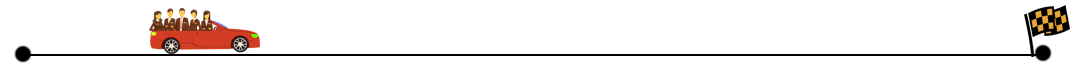

<br>

#### 3.1 Drop not needed column/s

In [3]:
dataset_df = dataset_df.drop(['Link', 'Type'], axis=1)

#### 3.2 Check null values

After we've removed any unnecessary columns, we'll look for missing values. In Pandas, the isna() method is used to search for missing values in a series object. If the values are NA, it will return a boolean same-sized object. True is assigned to missing values, while False is assigned to non-missing values.Side note, isnull() method is an alias for isna() method.

In [4]:
# count total rows with null value
num_null =  dataset_df.isna().sum().sum()

# before removing null values
print('Before:')
print('null values: {0}'.format(num_null))
print('total instances: ', len(dataset_df))

# display what columns has null values
display(dataset_df.isnull().any())

# drop nulls
dataset_df = dataset_df.dropna()

# redisplay
display('-'*100)
display(dataset_df.isnull().any())

# after removing
num_null =  dataset_df.isna().sum().sum()

print('After:')
print('null values: {0}'.format(num_null))
print('total instances: ', len(dataset_df))

Before:
null values: 0
total instances:  365


Location           False
Bedrooms           False
Bathrooms          False
Floor              False
Floors Area        False
Lot Area           False
Garage             False
Garden             False
Pet Friendly       False
Reservation Fee    False
Price              False
dtype: bool

'----------------------------------------------------------------------------------------------------'

Location           False
Bedrooms           False
Bathrooms          False
Floor              False
Floors Area        False
Lot Area           False
Garage             False
Garden             False
Pet Friendly       False
Reservation Fee    False
Price              False
dtype: bool

After:
null values: 0
total instances:  365


Since all variables are false this means that there are no null values and all values are acceptable.

#### 3.3 Identify unique values of the categorical columns

Categorical variables have different categories, but it can be difficult to identify them if the data set is large and the categories are often large in number. As a result, we can extract unique values for categorical variables, which will help us identify the categories of a categorical variable more readily. 

In our data frame, we can do this using the Pandas unique() method on a variable of interest. As a result, it will return a NumPy array containing the column's unique values.

In [5]:
#type_values = dataset_df['Type'].unique()
location_values = dataset_df['Location'].unique()
garden_values = dataset_df['Garden'].unique()
pet_friendly_values = dataset_df['Pet Friendly'].unique()

print('Categorical Unique Values')

print('-'*100)
print('Location unique values: ')
print(location_values)

#print('-'*100)
#print('Type unique values: ')
#print(type_values)

print('-'*100)
print('Garden: ')
print(garden_values)

print('-'*100)
print('Pet Friendly: ')
print(pet_friendly_values)

Categorical Unique Values
----------------------------------------------------------------------------------------------------
Location unique values: 
['Las Pinas City' 'Quezon City' 'Pasig City' 'Muntinlupa City'
 'Marikina City' 'Paranaque City' 'Caloocan City' 'Taguig City'
 'Manila City']
----------------------------------------------------------------------------------------------------
Garden: 
['yes' 'no']
----------------------------------------------------------------------------------------------------
Pet Friendly: 
['yes' 'no']


#### 3.4 Check for duplicates

Removing duplicates is an essential skill to get accurate counts because you often don't want to count the same thing multiple times. This could be accomplished by using the Pandas module, which has a method known as drop_duplicates().It takes an argument subset, which is the column we want to find or duplicates based on.

In [6]:
# removed duplicates
num_duplicates = len(dataset_df) - len(dataset_df.drop_duplicates(keep=False))

# before removing duplicates
print('Before:')
print('duplicates: {0}'.format(num_duplicates))
print('total instances: ', len(dataset_df))

# removed duplicates
dataset_df = dataset_df.drop_duplicates()

# afer removing
print('-'*100)
print('After:')
print('total instances: ', len(dataset_df))

Before:
duplicates: 93
total instances:  365
----------------------------------------------------------------------------------------------------
After:
total instances:  311


#### 3.5 Variable Creation


In variable creation a  dummy variable is one that takes only the value 0 or 1 to indicate the absence or presence of some categorical effect that may be expected to shift the outcome.They can be thought of as numeric stand-ins for qualitative facts in a regression model, sorting data into mutually exclusive categories.

 In this case we can use pandas.get_dummies() method for data manipulation. Wher it converts categorical data into dummy or indicator variables.

In [7]:
# encode categorical variables
#dummy_type = pd.get_dummies(dataset_df['Type'], prefix='Type')
dummy_location = pd.get_dummies(dataset_df['Location'], prefix='Location')
dummy_pet_friendly = pd.get_dummies(dataset_df['Pet Friendly'], prefix='Pet Friendly')
dummy_garden = pd.get_dummies(dataset_df['Garden'], prefix='Garden')

cleaned_df = dataset_df.drop(['Location', 'Pet Friendly', 'Garden'], axis=1)

# only include n-1 for the created columns for the categorical variable
# to avoid dummy variable trap

#cleaned_df['Type_Townhouse'] = dummy_type['Type_Townhouse']

cleaned_df['Location_Quezon City'] = dummy_location['Location_Quezon City']
cleaned_df['Location_Pasig City'] = dummy_location['Location_Pasig City']
cleaned_df['Location_Muntinlupa City'] = dummy_location['Location_Muntinlupa City']
cleaned_df['Location_Marikina City'] = dummy_location['Location_Marikina City']
cleaned_df['Location_Paranaque City'] = dummy_location['Location_Paranaque City']
cleaned_df['Location_Caloocan City'] = dummy_location['Location_Caloocan City']
cleaned_df['Location_Taguig City'] = dummy_location['Location_Taguig City']
cleaned_df['Location_Manila City'] = dummy_location['Location_Manila City']

#cleaned_df['Type_Townhouse'] = dummy_type['Type_Townhouse']

cleaned_df['Garden_yes'] = dummy_garden['Garden_yes']
cleaned_df['Pet_Friendly_yes'] = dummy_pet_friendly['Pet Friendly_yes']

# Location
#   1. Las Pinas City
#   2. Quezon City
#   3. Pasig City
#   4. Muntinlupa City
#   5. Marikina City
#   6. Paranaque City
#   7. Caloocan City
#   8. Taguig City
#   9. Manila City

# Type
#   1. House and Lot
#   2. Townhouse

# Garden
#   1. Yes
#   2. No

# Pet Friendly
#   1. Yes
#   2. No

#### 3.6 Convert data type

To cast a pandas object to a specific dtype, we can use the astype() method. In addition, it provides the capability to convert any suitable existing column to categorical type.

In [8]:
cleaned_df = cleaned_df.astype(float)
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 311 entries, 0 to 364
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Bedrooms                  311 non-null    float64
 1   Bathrooms                 311 non-null    float64
 2   Floor                     311 non-null    float64
 3   Floors Area               311 non-null    float64
 4   Lot Area                  311 non-null    float64
 5   Garage                    311 non-null    float64
 6   Reservation Fee           311 non-null    float64
 7   Price                     311 non-null    float64
 8   Location_Quezon City      311 non-null    float64
 9   Location_Pasig City       311 non-null    float64
 10  Location_Muntinlupa City  311 non-null    float64
 11  Location_Marikina City    311 non-null    float64
 12  Location_Paranaque City   311 non-null    float64
 13  Location_Caloocan City    311 non-null    float64
 14  Location_T

#### 3.7 Check Multicollinearity

Multicollinearity is where one of the explanatory variables is strongly correlated with another explanatory variable. One of the X variables, in essence, is almost completely correlated with another or more X variables.

##### 3.7.1 Correlation Matrix

In order to check the multicollinearity, these are the following things that we need to follow. First is the contruction of the  correlation matrix using the corr() method; this will create a matrix with each variable having its correlation calculated for all the other variables. Followed by a correlation heatmap to identify the highly correlated variables, by just looking for the darker colors. 

,Bedrooms,Bathrooms,Floor,Floors Area,Lot Area,Garage,Reservation Fee,Price,Location_Quezon City,Location_Pasig City,Location_Muntinlupa City,Location_Marikina City,Location_Paranaque City,Location_Caloocan City,Location_Taguig City,Location_Manila City,Garden_yes,Pet_Friendly_yes
Bedrooms,1.000000,0.421890,0.226965,-0.005992,0.213550,0.021573,0.162645,-0.048647,0.199872,0.155994,-0.070303,0.270216,-0.156443,0.256385,0.134226,0.059868,0.056824,0.018633
Bathrooms,0.421890,1.000000,0.100099,0.015178,0.026541,0.060094,0.186691,-0.092651,0.008214,0.100912,0.011123,0.108321,0.045325,-0.024291,0.070889,-0.084377,0.006450,-0.035044
Floor,0.226965,0.100099,1.000000,0.012618,-0.020379,0.026935,0.036147,-0.031667,-0.059874,0.122274,0.006356,0.041359,-0.055391,0.012686,0.330974,-0.112194,-0.010956,0.067695
Floors Area,-0.005992,0.015178,0.012618,1.000000,0.028419,-0.010445,-0.037842,0.070878,0.093239,-0.007003,-0.016916,-0.026116,0.095259,-0.025927,-0.003819,-0.006499,0.063690,-0.037632
Lot Area,0.213550,0.026541,-0.020379,0.028419,1.000000,0.111902,0.036684,0.044265,-0.006107,0.056505,-0.058548,0.057437,-0.037121,0.168861,0.051377,0.116909,0.008797,0.005077
Garage,0.021573,0.060094,0.026935,-0.010445,0.111902,1.000000,-0.020795,0.028747,0.008529,-0.020809,-0.022108,0.048229,-0.024660,-0.044124,-0.014618,-0.010303,-0.047213,0.041919
Reservation Fee,0.162645,0.186691,0.036147,-0.037842,0.036684,-0.020795,1.000000,-0.933644,0.054047,-0.021226,-0.029361,0.101181,0.135787,0.033526,0.018012,-0.039691,0.044619,0.041587
Price,-0.048647,-0.092651,-0.031667,0.070878,0.044265,0.028747,-0.933644,1.000000,-0.029488,0.060506,0.007074,-0.035527,-0.141094,-0.109316,-0.028383,0.058053,-0.040545,-0.058487
Location_Quezon City,0.199872,0.008214,-0.059874,0.093239,-0.006107,0.008529,0.054047,-0.029488,1.000000,-0.070270,-0.074656,-0.175557,-0.130621,-0.148999,-0.049364,-0.034792,0.042949,0.109056
Location_Pasig City,0.155994,0.100912,0.122274,-0.007003,0.056505,-0.020809,-0.021226,0.060506,-0.070270,1.000000,-0.028051,-0.065962,-0.049078,-0.055983,-0.018547,-0.013073,-0.076267,-0.008402


<AxesSubplot:>

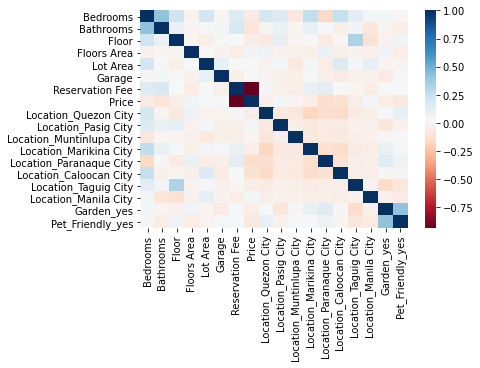

In [9]:
# calculate the correlation matrix
corr = cleaned_df.corr()

# display the correlation matrix
display(corr)

# plot the correlation heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, cmap='RdBu')

Looking at the heatmap along with the correlation matrix we can identify a correlated variables namely the Reservation Fee and Price. It makes sense that these two are correlated; if you're getting a big house or townhouse, the reservation free will almost certainly rise.

##### 3.7.2 Variance Inflation Factor

One method we can use is the variance_inflation_factor which is a measure of how much a particular variable is contributing to the standard error in the model.

To understand the variance inflation factor, use the following rule of thumb: 1 indicates that there is no link between the two variables. Moderately correlated is between 1 and 5. Highly correlated if the number is greater than five. We should eliminate a variable from the model if its value is greater than 5 or higher. First, we can run the VFI data to see which variables need to be removed. 

In [10]:
# Price is drop because it is dependent variable
cleaned_df_check = cleaned_df.drop(columns=['Price',])

# the VFI does expect a constant term in the data, so we need to add one using the add_constant method
X1 = sm.tools.add_constant(cleaned_df_check)

# create the series for before the drop
series = pd.Series([variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])], index=X1.columns)

# display the series
print('VIF score')
print('-'*100)
display(series)

VIF score
----------------------------------------------------------------------------------------------------


const                       67.942623
Bedrooms                     2.069492
Bathrooms                    1.346461
Floor                        1.241599
Floors Area                  1.038763
Lot Area                     1.111396
Garage                       1.036140
Reservation Fee              1.093440
Location_Quezon City         1.455103
Location_Pasig City          1.139386
Location_Muntinlupa City     1.045394
Location_Marikina City       1.458748
Location_Paranaque City      1.189733
Location_Caloocan City       1.441225
Location_Taguig City         1.206966
Location_Manila City         1.079992
Garden_yes                   1.299535
Pet_Friendly_yes             1.275740
dtype: float64

Since, in our dataset there is no attribute whose value is greater than 5, then we can say that our data is Moderately Correlated.

##### 3.7.3 Scatter Plot Matrix

Another way to visualize our data to check for multicollinearity. Inside of pandas, there is a scatter_matrix chart that will create a scatter plot for each variable in our dataset against another variable. This is a great tool for visualizing the correlation of one variable across all the other variables in the dataset.

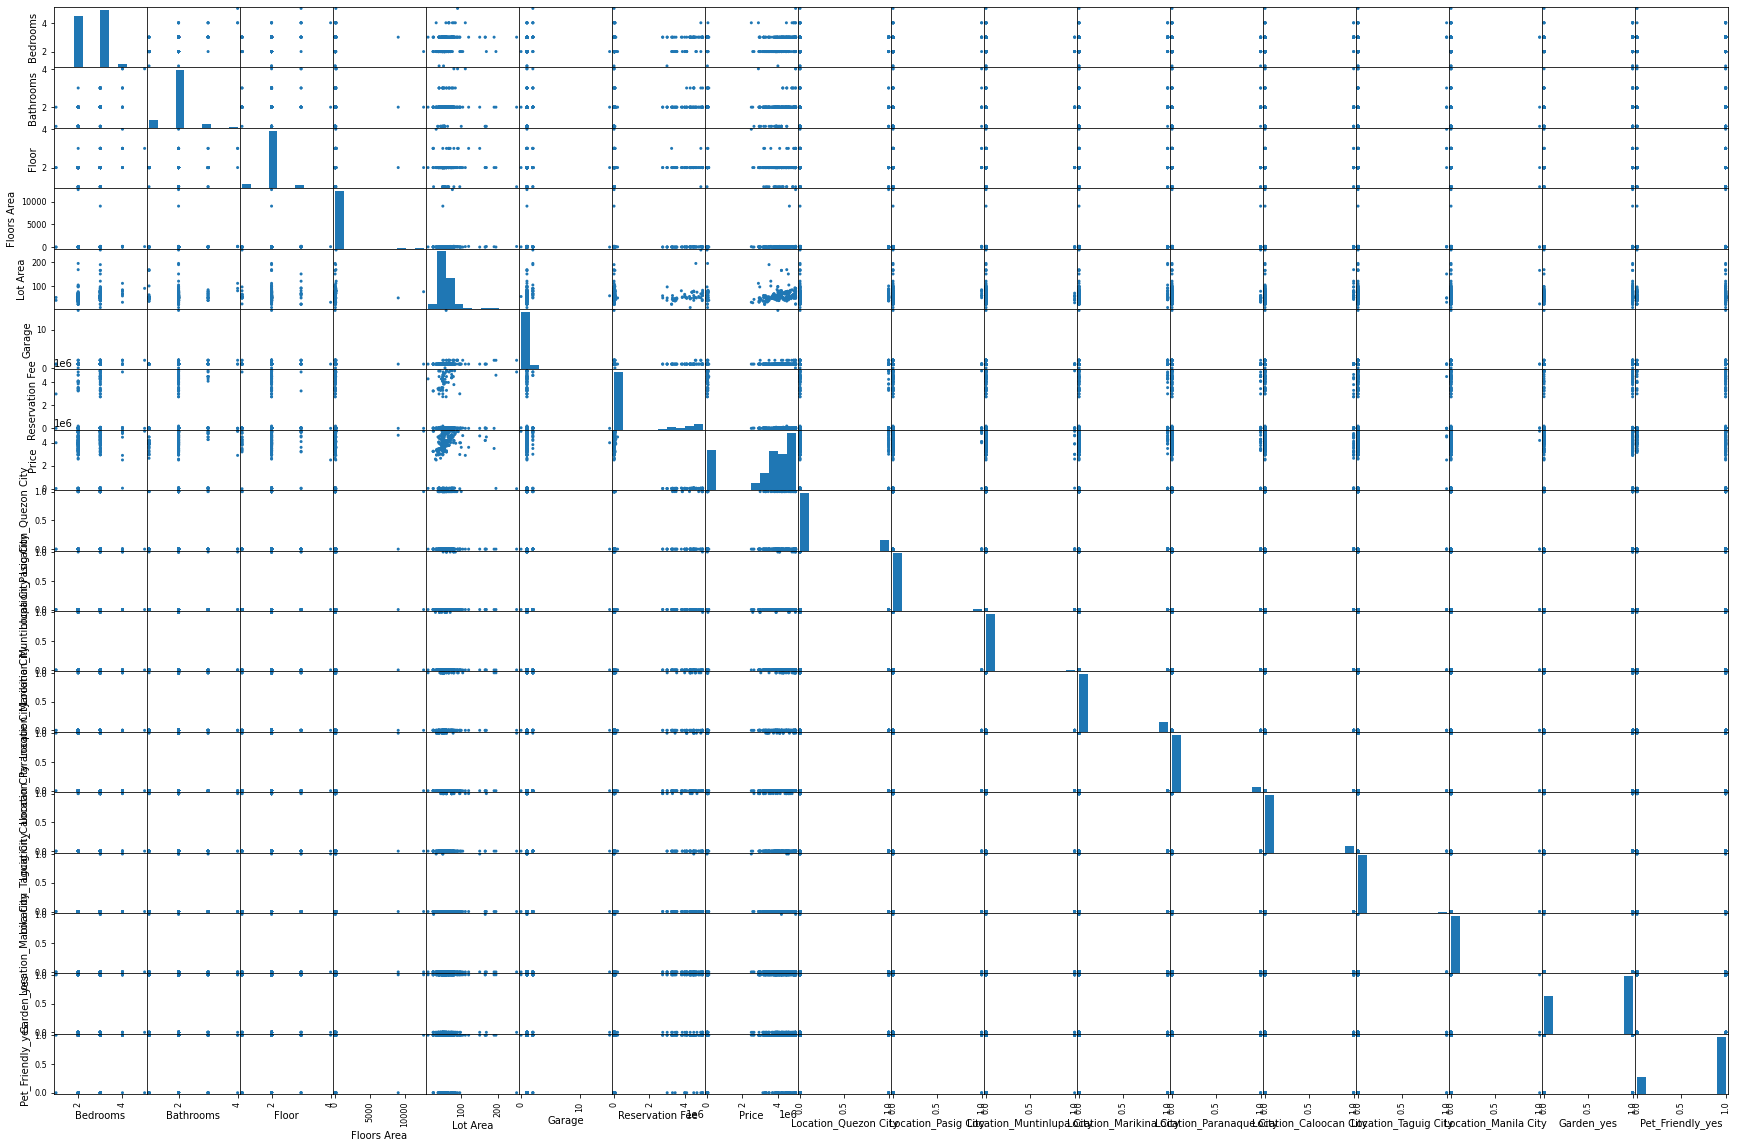

In [11]:
# define the plot
pd.plotting.scatter_matrix(cleaned_df, alpha = 1, figsize = (30, 20))

# show the plot
plt.show()

#### 3.8 Check Outliers

Outliers are anomalous values in our dataset that can cause statistical analyses to be skewed and assumptions to be violated. Because we have an outlier, which will increase the variability in our data and reduce our dataset's statistical power, we will remove it in order to have a clean dataset.

In [12]:
# before removing outliers
print('Before:')
print('total instances: {0}'.format(len(cleaned_df)))

# filter the data frame to remove the values exceeding 3 standard deviations
cleaned_remove_df = cleaned_df[(np.abs(stats.zscore(cleaned_df.values[:,:7])) < 3).all(axis=1)]

# what rows were removed
cleaned_outliers_df = cleaned_df.index.difference(cleaned_remove_df.index)

# total outliers
total_outliers = len(cleaned_outliers_df)

# assign the cleaned data (without outliers)
cleaned_df = cleaned_remove_df

# after removing outliers
print('-'*100)
print('After:')
print('outliers: ', cleaned_outliers_df.values)
print('total outliers index: ', len(cleaned_outliers_df))
print('cleaned instances: ', len(cleaned_df))

Before:
total instances: 311
----------------------------------------------------------------------------------------------------
After:
outliers:  [ 49  72 111 117 151 184 185 230 301 314 332 334 348 353]
total outliers index:  14
cleaned instances:  297


#### 3.9 Dataset Summary

Before we get to an in-depth exploration of the data or even building the model, we should explore the data a little more and see how the data is distributed and if there are any outliers. I will be adding a few more metrics to the summary data frame, so that it now includes a metric for three standard deviations below and above the mean.

In [13]:
# get the summary
desc_df = cleaned_df.describe()

# add the standard deviation metric
desc_df.loc['+3_std'] = desc_df.loc['mean'] + (desc_df.loc['std'] * 3)
desc_df.loc['-3_std'] = desc_df.loc['mean'] - (desc_df.loc['std'] * 3)

display(desc_df)

,Bedrooms,Bathrooms,Floor,Floors Area,Lot Area,Garage,Reservation Fee,Price,Location_Quezon City,Location_Pasig City,Location_Muntinlupa City,Location_Marikina City,Location_Paranaque City,Location_Caloocan City,Location_Taguig City,Location_Manila City,Garden_yes,Pet_Friendly_yes
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,2.970000e+02,2.970000e+02,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,2.545455,1.959596,1.973064,74.638586,56.320875,1.050505,8.666765e+05,3.322203e+06,0.161616,0.023569,0.030303,0.141414,0.080808,0.104377,0.006734,0.003367,0.606061,0.771044
std,0.550296,0.400655,0.317212,23.149676,14.709693,0.234250,1.692865e+06,1.762925e+06,0.368720,0.151958,0.171709,0.349036,0.273000,0.306265,0.081922,0.058026,0.489446,0.420870
min,1.000000,1.000000,1.000000,37.000000,10.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,2.000000,57.000000,49.000000,1.000000,0.000000e+00,3.153000e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,3.000000,2.000000,2.000000,75.000000,54.000000,1.000000,2.000000e+04,3.952000e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,3.000000,2.000000,2.000000,88.000000,64.000000,1.000000,5.000000e+04,4.550000e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,4.000000,3.000000,3.000000,200.000000,120.000000,2.000000,5.000000e+06,5.000000e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
+3_std,4.196342,3.161560,2.924699,144.087614,100.449956,1.753255,5.945271e+06,8.610977e+06,1.267775,0.479443,0.545430,1.188523,0.899808,1.023173,0.252501,0.177445,2.074400,2.033654
-3_std,0.894567,0.757632,1.021428,5.189558,12.191795,0.347755,-4.211918e+06,-1.966571e+06,-0.944543,-0.432305,-0.484824,-0.905695,-0.738192,-0.814418,-0.239033,-0.170711,-0.862278,-0.491567


<br>

In [14]:
cleaned_v2_df = cleaned_df.copy(deep=True)

cleaned_v2_df

,Bedrooms,Bathrooms,Floor,Floors Area,Lot Area,Garage,Reservation Fee,Price,Location_Quezon City,Location_Pasig City,Location_Muntinlupa City,Location_Marikina City,Location_Paranaque City,Location_Caloocan City,Location_Taguig City,Location_Manila City,Garden_yes,Pet_Friendly_yes
0,2.0,1.0,2.0,67.0,55.0,1.0,0.0,3900001.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,3.0,2.0,2.0,78.0,58.0,1.0,30000.0,4987000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,3.0,2.0,2.0,65.0,60.0,1.0,50000.0,4200000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,3.0,2.0,2.0,70.0,52.0,1.0,30000.0,4480000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,3.0,2.0,2.0,65.0,48.0,1.0,50000.0,3800000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
358,3.0,2.0,2.0,82.0,60.0,1.0,0.0,4800000.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0
359,2.0,2.0,2.0,44.0,48.0,1.0,20000.0,3450000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
361,2.0,1.0,2.0,54.0,49.0,1.0,0.0,3500000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
362,2.0,2.0,2.0,49.0,70.0,1.0,0.0,4194000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


<br>

### 4. Model Planning and Building

&nbsp;&nbsp;&nbsp;&nbsp; 3.1. Import Libraries <br>
&nbsp;&nbsp;&nbsp;&nbsp; 3.2. Define Dependent and Independent Variables <br>
&nbsp;&nbsp;&nbsp;&nbsp; 3.3. Define Train and Test Set <br>
&nbsp;&nbsp;&nbsp;&nbsp; 3.4. Model Building <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 3.4.1. Multiple Linear Regression <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 3.4.2. Decision Tree <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 3.4.3. Random Forest <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 3.4.4. Multi Layer Perceptron Model <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 3.4.5. KMeans Clustering <br>

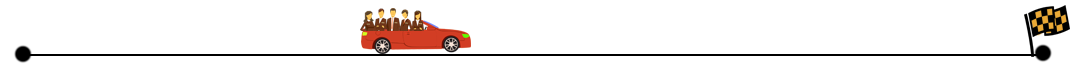

#### 4.1. Import Libraries <br>

In [15]:
#import libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor 
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.datasets import make_classification
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import math

#### Method Definition
In here, we defined methods for splitting the data, getting the accuracy score, predictions, and errors to reduce our code 

In [16]:
def split_dataset(cleaned_df, X, Y): 
    # Splitting the dataset into train and test 
    X_train, X_test, y_train, y_test = train_test_split(  
    X, Y, test_size = 0.2, random_state = 100) 
      
    return X_train, X_test, y_train, y_test

def get_accuracy_score(model, x_set, y_set):
    return model.score(x_set, y_set)

def get_predictions(model, x_set): 
    y_predictions = model.predict(X_test) 
    return y_predictions

def get_errors(y_test, y_predict):
    # calculate the mean squared error
    model_mse = mean_squared_error(y_test, y_predict)
    # calculate the mean absolute error
    model_mae = mean_absolute_error(y_test, y_predict)
    # calulcate the root mean squared error
    model_rmse =  math.sqrt(model_mse)
    return model_mse, model_mae, model_rmse


#### 4.2. Define Dependent and Independent Variables <br>

In [17]:
X = cleaned_df.drop('Price', axis = 1)
Y = cleaned_df[['Price']]

print('Independent Variables: ')
display(X.head(5))
print('-'*100)
print('Dependent Variables: ')
display(Y.head(5))

Independent Variables: 


,Bedrooms,Bathrooms,Floor,Floors Area,Lot Area,Garage,Reservation Fee,Location_Quezon City,Location_Pasig City,Location_Muntinlupa City,Location_Marikina City,Location_Paranaque City,Location_Caloocan City,Location_Taguig City,Location_Manila City,Garden_yes,Pet_Friendly_yes
0,2.0,1.0,2.0,67.0,55.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1,3.0,2.0,2.0,78.0,58.0,1.0,30000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,3.0,2.0,2.0,65.0,60.0,1.0,50000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,3.0,2.0,2.0,70.0,52.0,1.0,30000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,3.0,2.0,2.0,65.0,48.0,1.0,50000.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


----------------------------------------------------------------------------------------------------
Dependent Variables: 


,Price
0,3900001.0
1,4987000.0
2,4200000.0
3,4480000.0
4,3800000.0


#### 4.3. Define Train and Test Set <br>

In [18]:
X_train, X_test, y_train, y_test = split_dataset(cleaned_df, X, Y) 

#### 4.3. Model Building <br>

#### 4.3.1. Multiple Linear Regression <br>

#### Accuracy Test
Quantifying the accuracy of the model is an important step to justifying the usage of the model.

As shown below, the model has an accuracy of 93.78% for the train set and 84.45% for the test set. Thus, implies that the predictions and usage of the model linear regression to our data is 93.78% accurate for the train set and 84.45% for the test set.

In [19]:
# create a Linear Regression model object
regression_model = LinearRegression()

# pass through the X_train & y_train data set
regression_model.fit(X_train, y_train)

accuracy_train = get_accuracy_score(regression_model, X_train, y_train)
accuracy_test = get_accuracy_score(regression_model, X_test, y_test)

print('Accuracy Train: {0:.2f}%'.format(accuracy_train * 100))
print('Accuracy Test: {0:.2f}%'.format(accuracy_test * 100))

Accuracy Train: 93.78%
Accuracy Test: 84.45%


#### Predictions
Applying predictions is a good way to improve more and determine if the model is not only itself accurate but also diverse. <br><br>As shown below, in the first row, we predicted a value of P4,355,528 if all independent variables were to be 1 and P4,474,800 if all independent variables were to be 2 and so on and so forth. In addtion, the model has an R Squared of 84% which implies that the model is a good fit to our data

In [20]:
# Get multiple predictions
y_predictions= get_predictions(regression_model, X_test)

# Show the first 5 predictions
print('-'*100)
print('Predictions:')
display(y_predictions[:5])

model_r2 = r2_score(y_test, y_predictions)
print("R Squared: {:.2}".format(model_r2))

----------------------------------------------------------------------------------------------------
Predictions:


array([[4355528.33250099],
       [4474800.65023242],
       [3926629.15459845],
       [3835382.94510465],
       [5240095.34950777]])

R Squared: 0.84


#### Prediction Errors
One of the simplest methods for calculating the correctness of a model is to use the error between predicted value and actual value. MSE is the average squared difference between the estimated values and the actual value, MAE tells us how big of an error we can expect from the forecast on average and lastly, RMSE is the square root of average value of squared error in a set of predicted values, without considering direction. <br><br>As shown below, with the fact that RMSE is higher than the MAE, this implies that there is a variation in the magnitude of errors and very large errors are unlikely to have occured.Thus, with RMSE not being too much high than MAE, implies that there is no outlier in the data

In [21]:
model_mse, model_mae, model_rmse = get_errors(y_test, y_predictions)

print("Multiple Regression Prediction Errors: ")
print("Mean Squared Error {0}".format(model_mse))
print("Mean Absolute Error {0}".format(model_mae))
print("Root Mean Squared Error {0}".format(model_rmse))

Multiple Regression Prediction Errors: 
Mean Squared Error 422186027888.23083
Mean Absolute Error 470159.0225516364
Root Mean Squared Error 649758.4381046782


#### 4.3.2 Decision Tree 

#### Gini Index and Entropy Accuracy Test
Quantifying the accuracy of the model is an important step to justifying the usage of the model. Gini index or Gini impurity measures the degree or probability of a particular variable being wrongly classified when it is randomly chosen. While entropy measure how “mixed” a column is. In this case, we measured the accuracy of the model through gini index and entropy.<br><br> As shown below, it is undeniable that the test set's predictions are not that precise for it only got low accuracy score. However, the train set produced a high accuracy score which means the predcitions are 97.89% correct

In [22]:
# Decision tree with entropy, gini
decision_entropy_model = DecisionTreeClassifier(criterion = "entropy",random_state = 100,)
decision_gini_model = DecisionTreeClassifier(criterion = "gini", random_state = 100,) 

decision_entropy_model.fit(X_train, y_train)
decision_gini_model.fit(X_train, y_train) 

accuracy_train_entropy = get_accuracy_score(decision_entropy_model, X_train, y_train)
accuracy_test_entropy = get_accuracy_score(decision_entropy_model, X_test, y_test)
accuracy_train_gini = get_accuracy_score(decision_gini_model, X_train, y_train)
accuracy_test_gini = get_accuracy_score(decision_gini_model, X_test, y_test)

print('Entropy Accuracy Train: {0:.2f}%'.format(accuracy_train_entropy * 100))
print('Entropy Accuracy Test: {0:.2f}%'.format(accuracy_test_entropy * 100))
print('-'*100)
print('Gini Accuracy Train: {0:.2f}%'.format(accuracy_train_gini * 100))
print('Gini Accuracy Test: {0:.2f}%'.format(accuracy_test_gini * 100))

y_train_predictions_entropy = get_predictions(decision_entropy_model, X_train)
y_test_predictions_entropy = get_predictions(decision_entropy_model, X_test)
y_train_predictions_gini = get_predictions(decision_gini_model, X_train)
y_test_predictions_gini= get_predictions(decision_gini_model, X_test)

Entropy Accuracy Train: 97.89%
Entropy Accuracy Test: 26.67%
----------------------------------------------------------------------------------------------------
Gini Accuracy Train: 97.89%
Gini Accuracy Test: 31.67%


#### Gini and Entropy Prediction Errors
One of the simplest methods for calculating the correctness of a model is to use the error between predicted value and actual value. MSE is the average squared difference between the estimated values and the actual value, MAE tells us how big of an error we can expect from the forecast on average and lastly, RMSE is the square root of average value of squared error in a set of predicted values, without considering direction. <br><br>As shown below, with the fact that RMSE is higher than the MAE, this implies that there is variation in the magnitude of errors and very large errors are unlikely to have occured.Thus, with RMSE not being too much high than MAE, implies that there is no outlier in the data.

In [23]:
model_mse, model_mae, model_rmse = get_errors(y_test, y_test_predictions_gini)

print("Decision Tree (Gini) Prediction Errors: ")
print("Mean Squared Error {0}".format(model_mse))
print("Mean Absolute Error {0}".format(model_mae))
print("Root Mean Squared Error {0}".format(model_rmse))

print('-'*100)

model_mse, model_mae, model_rmse = get_errors(y_test, y_test_predictions_entropy)
print("Decision Tree (Entropy) Prediction Errors: ")
print("Mean Squared Error {0}".format(model_mse))
print("Mean Absolute Error {0}".format(model_mae))
print("Root Mean Squared Error {0}".format(model_rmse))

Decision Tree (Gini) Prediction Errors: 
Mean Squared Error 269573796181.68332
Mean Absolute Error 286638.11666666664
Root Mean Squared Error 519204.96548249933
----------------------------------------------------------------------------------------------------
Decision Tree (Entropy) Prediction Errors: 
Mean Squared Error 205486024793.6
Mean Absolute Error 246998.1
Root Mean Squared Error 453305.6637563665


#### 4.3.3. Random Forest<br>

#### Accuracy Test
The accuracy of the model is an important step to justifying the usage of the model. Random Forest uses multiple models of several DTs to obtain a better prediction performance. It creates many classification trees and a bootstrap sample technique is used to train each tree from the set of training data. 
<br><br> As shown below, the model has an accuracy of 99.45% for the train set and 94.51% for the test set. Thus, implies that the predictions and usage of the model random forest to our data is 99.45% accurate for the train set and 94.51% for the test set.

In [24]:
random_forest_model = RandomForestRegressor(n_estimators = 100, random_state = 0)
random_forest_model.fit(X_train, y_train.values.flatten())  

accuracy_train = get_accuracy_score(random_forest_model,X_train,y_train)
accuracy_test = get_accuracy_score(random_forest_model,X_test,y_test)

print('Accuracy Train: {0}%'.format(accuracy_train * 100))
print('Accuracy Test: {0}%'.format(accuracy_test * 100))

Accuracy Train: 99.45435402762185%
Accuracy Test: 94.51481948652155%


#### Prediction Errors
One of the simplest methods for calculating the correctness of a model is to use the error between predicted value and actual value. MSE is the average squared difference between the estimated values and the actual value, MAE tells us how big of an error we can expect from the forecast on average and lastly, RMSE is the square root of average value of squared error in a set of predicted values, without considering direction. <br><br>As shown below, with the fact that RMSE is higher than the MAE, this implies that there is variation in the magnitude of errors and very large errors are unlikely to have occured.Thus, with RMSE not being too much high than MAE, implies that there is no outlier in the data.

In [25]:
# Get multiple predictions
y_predictions= get_predictions(random_forest_model, X_test)

model_mse, model_mae, model_rmse = get_errors(y_test, y_predictions)

print("Decision Tree (Gini) Prediction Errors: ")
print("Mean Squared Error {0}".format(model_mse))
print("Mean Absolute Error {0}".format(model_mae))
print("Root Mean Squared Error {0}".format(model_rmse))

Decision Tree (Gini) Prediction Errors: 
Mean Squared Error 148880943875.0694
Mean Absolute Error 236761.9166944445
Root Mean Squared Error 385850.93478579185


#### 4.3.4. Multi Layer Perceptron Model <br>

#### Accuracy Test
The accuracy of the model is an important step to justifying the usage of the model. A multilayer perceptron is a neural network connecting multiple layers in a directed graph, which means that the signal path through the nodes only goes one way.

As shown below, it is undeniable that the model is not a good fit to our data as it only have less than 11% of accuracy score. Thus, these values of accuracy scores imply that the predictions and usage of the model multi layer perceptron to our data is only 8.86% accurate for the train set and 10% accurate for the test set.

In [26]:
mlp_model = MLPClassifier(random_state=1, max_iter=300)
mlp_model.fit(X_train, y_train.values.flatten())

# accuracy percentage
accuracy_train = get_accuracy_score(mlp_model,X_train,y_train)
accuracy_test = get_accuracy_score(mlp_model,X_test,y_test)

print('Accuracy Train: {0}%'.format(accuracy_train * 100))
print('Accuracy Test: {0}%'.format(accuracy_test * 100))

Accuracy Train: 8.860759493670885%
Accuracy Test: 10.0%


#### Prediction Errors
One of the simplest methods for calculating the correctness of a model is to use the error between predicted value and actual value. MSE is the average squared difference between the estimated values and the actual value, MAE tells us how big of an error we can expect from the forecast on average and lastly, RMSE is the square root of average value of squared error in a set of predicted values, without considering direction. <br><br>
As shown below, with the fact that RMSE is higher than the MAE, this implies that there is variation in the magnitude of errors and very large errors are unlikely to have occured.Thus, with RMSE not being too much high than MAE, implies that there is no outlier in the data.

In [27]:
# Get multiple predictions
y_predictions= get_predictions(mlp_model, X_test)

model_mse, model_mae, model_rmse = get_errors(y_test, y_predictions)

print("Decision Tree (Gini) Prediction Errors: ")
print("Mean Squared Error {0}".format(model_mse))
print("Mean Absolute Error {0}".format(model_mae))
print("Root Mean Squared Error {0}".format(model_rmse))

Decision Tree (Gini) Prediction Errors: 
Mean Squared Error 9288676982848.316
Mean Absolute Error 2301333.316666667
Root Mean Squared Error 3047733.0891743647


#### 4.3.5. KMeans Clustering <br>

#### Accuracy Test
The accuracy of the model is an important step to justifying the usage of the model. K-means algorithm identifies k number of centroids, and then allocates every data point to the nearest cluster, while keeping the centroids as small as possible
<br><br>
As shown below, it is undeniable that the model is not a good fit to our data as it have extreme negative values of accuracy score. Thus, these values of accuracy scores imply that the predictions and usage of the model multi layer perceptron to our data is -1949802617711777.8% accurate for the train set and -666073314398989.8% accurate for the test set.

In [28]:
# n_clusters=The number of clusters to form as well as the number of centroids to generate.
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train, y_train)

# accuracy percentage
accuracy_train = kmeans.score(X_train,y_train)
accuracy_test = kmeans.score(X_test,y_test)

print('Accuracy Train: {0}%'.format(accuracy_train * 100))
print('Accuracy Test: {0}%'.format(accuracy_test * 100))

Accuracy Train: -1949802617711777.8%
Accuracy Test: -666073314398989.8%


#### Prediction Errors
One of the simplest methods for calculating the correctness of a model is to use the error between predicted value and actual value. MSE is the average squared difference between the estimated values and the actual value, MAE tells us how big of an error we can expect from the forecast on average and lastly, RMSE is the square root of average value of squared error in a set of predicted values, without considering direction. <br><br>
As shown below, with the fact that RMSE is higher than the MAE, this implies that there is variation in the magnitude of errors and very large errors are unlikely to have occured. Thus, with RMSE not being too much high than MAE, implies that there is no outlier in the data.

In [29]:
# Get multiple predictions
y_predictions= get_predictions(kmeans, X_test)

model_mse, model_mae, model_rmse = get_errors(y_test, y_predictions)

print("Decision Tree (Gini) Prediction Errors: ")
print("Mean Squared Error {0}".format(model_mse))
print("Mean Absolute Error {0}".format(model_mae))
print("Root Mean Squared Error {0}".format(model_rmse))

Decision Tree (Gini) Prediction Errors: 
Mean Squared Error 14860775841848.482
Mean Absolute Error 3485188.0166666666
Root Mean Squared Error 3854967.6836321834


#### Model Conclusion
Among the five models conducted, two of them passed the 80% accuracy score requirements which includes the models multiple linear regression and random forest. However, the models decision tree, multi layer perceptron and Kmeans clustering didn't passs for they only have below 80% accuracy score. Thus, speaking of good fit, it seems that the model random forest would possibly be the best model due to the fact that it have extremely high accuracy score.

<br>

### 5. Model Evaluation - Multiple Linear Regression

&nbsp;&nbsp;&nbsp;&nbsp; 4.1. Import Libraries <br>
&nbsp;&nbsp;&nbsp;&nbsp; 4.2. Checking for Heteroscedasticity <br>
&nbsp;&nbsp;&nbsp;&nbsp; 4.3. Checking for Autocorrelation <br>
&nbsp;&nbsp;&nbsp;&nbsp; 4.4. Checking the Mean of the Residuals Equals 0 <br>
&nbsp;&nbsp;&nbsp;&nbsp; 4.5. Confidence Intervals <br>
&nbsp;&nbsp;&nbsp;&nbsp; 4.6. Remove the Insignificant Variables. <br>
&nbsp;&nbsp;&nbsp;&nbsp; 4.7. Create a Summary of the Model Output <br>
&nbsp;&nbsp;&nbsp;&nbsp; 4.8. Rerun the Model <br>

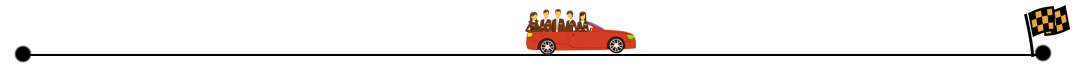

#### 5.1. Import Libraries

In [30]:
import statsmodels.api as sm
from statsmodels.stats import diagnostic as diag
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [31]:
# define our intput
X2 = sm.add_constant(X)

# create a OLS model
model = sm.OLS(Y, X2)

# fit the data
est = model.fit()

#### 5.2 Checking for Heteroscedasticity

Absence heteroscedasticity is another assumption for our model creation. It means the standard errors of a variable, monitored over a specific amount of time, are non-constant. We used the Breusch-Pagan test to check the heteroscedasticity of our dataset.

In [32]:
# Run the Breusch-Pagan test
_, pval, __, f_pval = diag.het_breuschpagan(est.resid, est.model.exog)
print(pval, f_pval)
print('-'*100)

# print the results of the test
if pval > 0.05:
    print("For the Breusch-Pagan's Test")
    print("The p-value was {:.4}".format(pval))
    print("We fail to reject the null hypthoesis, so there is no heterosecdasticity.")

else:
    print("For the Breusch-Pagan's Test")
    print("The p-value was {:.4}".format(pval))
    print("We reject the null hypthoesis, so there is heterosecdasticity.")

9.39927184017732e-11 9.640915831308153e-13
----------------------------------------------------------------------------------------------------
For the Breusch-Pagan's Test
The p-value was 9.399e-11
We reject the null hypthoesis, so there is heterosecdasticity.


The test had shown us that the our data set is heteroscedastic. This means that it causes the coefficient estimates to be less precise. The lower precision increases the likelihood that the coefficient estimates are further from the correct population value.

#### 5.3 Checking for Autocorrelation

Autocorrelation is a characteristic of data in which the correlation between the values of the same variables is based on related objects. It violates the assumption of instance independence, which underlies most of conventional models.

The number of lags will be 10
----------------------------------------------------------------------------------------------------
The lowest p-value found was 0.578
We fail to reject the null hypthoesis, so there is no autocorrelation.
----------------------------------------------------------------------------------------------------


C:\Users\Rosalijos\anaconda3\lib\site-packages\statsmodels\stats\diagnostic.py:559: FutureWarning: The value returned will change to a single DataFrame after 0.12 is released.  Set return_df to True to use to return a DataFrame now.  Set return_df to False to silence this warning.
  warnings.warn(msg, FutureWarning)


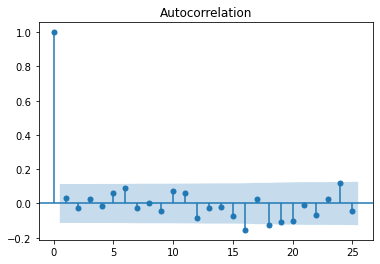

In [33]:
# test for autocorrelation
from statsmodels.stats.stattools import durbin_watson

# calculate the lag, optional
lag = min(10, (len(X)//5))
print('The number of lags will be {}'.format(lag))
print('-'*100)

# run the Ljung-Box test for no autocorrelation of residuals
# test_results = diag.acorr_breusch_godfrey(est, nlags = lag, store = True)
test_results = diag.acorr_ljungbox(est.resid, lags = lag)

# grab the p-values and the test statistics
ibvalue, p_val = test_results

# print the results of the test
if min(p_val) > 0.05:
    print("The lowest p-value found was {:.4}".format(min(p_val)))
    print("We fail to reject the null hypthoesis, so there is no autocorrelation.")
    print('-'*100)
else:
    print("The lowest p-value found was {:.4}".format(min(p_val)))
    print("We reject the null hypthoesis, so there is autocorrelation.")
    print('-'*100)

# plot autocorrelation
sm.graphics.tsa.plot_acf(est.resid)
plt.show()

#### 5.4 Checking the Mean of the Residuals Equals 0

The QQ pplot helps us assess if a set of data plausibly came from some theoretical distribution such as a Normal or exponential. It’s just a visual check, not an air-tight proof, so it is somewhat subjective.

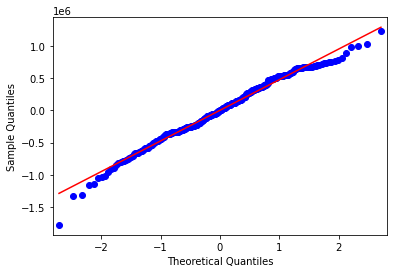

The mean of the residuals is -0.0001267


In [34]:
import pylab

# check for the normality of the residuals
sm.qqplot(est.resid, line='s')
pylab.show()

# also check that the mean of the residuals is approx. 0.
mean_residuals = sum(est.resid)/ len(est.resid)
print("The mean of the residuals is {:.4}".format(mean_residuals))

#### 5.5 Confidence Intervals

In [35]:
# make some confidence intervals, 95% by default
est.conf_int()

,0,1
const,1.854956e+06,2.936102e+06
Bedrooms,1.545751e+05,4.666655e+05
Bathrooms,-2.227447e+04,2.975933e+05
Floor,-3.392178e+05,5.570461e+04
Floors Area,5.972496e+03,1.230931e+04
Lot Area,6.065708e+03,1.511252e+04
Garage,-3.855893e+05,1.515594e+05
Reservation Fee,-1.029680e+00,-9.590410e-01
Location_Quezon City,-4.047983e+05,-3.075453e+04
Location_Pasig City,-5.489165e+05,2.394923e+05


#### 5.5 Hypothesis Testing

The code below shows the estimated p-values of the independent variables. This helps us identify the irrelevant variables that has a p-value greater than 5.

In [36]:
# estimate the p-values
est.pvalues

const                        2.489753e-16
Bedrooms                     1.121627e-04
Bathrooms                    9.131584e-02
Floor                        1.587173e-01
Floors Area                  3.396379e-08
Lot Area                     6.186427e-06
Garage                       3.918187e-01
Reservation Fee             1.287112e-152
Location_Quezon City         2.263813e-02
Location_Pasig City          4.404298e-01
Location_Muntinlupa City     4.954410e-01
Location_Marikina City       1.835977e-01
Location_Paranaque City      4.951938e-01
Location_Caloocan City       1.016247e-10
Location_Taguig City         1.771174e-01
Location_Manila City         2.723756e-01
Garden_yes                   9.567661e-01
Pet_Friendly_yes             9.810994e-01
dtype: float64

Based on the result above, there are 12 irrelevant variables: <strong>'Bathrooms'</strong>, <strong>'Lot Area'</strong>, <strong>'Garden_yes'</strong>, <strong>'Pet_Friendly_yes'</strong>, <strong>'Location_Manila City'</strong>, <strong>'Location_Taguig City'</strong>, <strong>'Location_Paranaque City'</strong>, <strong>'Location_Marikina City'</strong>, <strong>'Location_Muntinlupa City'</strong>, <strong>'Location_Pasig City'</strong>, <strong>'Location_Quezon City'</strong>, <strong> 'Garage' </strong>. This implies that we will need exclude these variables and rerun the model.

#### 5.6 Remove the Insignificant Variables

In [37]:
# define our input variable (X) & output variable
cleaned_df = cleaned_df.drop(['Bathrooms', 'Lot Area','Garden_yes','Pet_Friendly_yes', 'Location_Manila City', 'Location_Taguig City', 'Location_Paranaque City', 'Location_Marikina City', 'Location_Muntinlupa City', 'Location_Pasig City', 'Location_Quezon City', 'Garage'], axis = 1)

X = cleaned_df.drop('Price', axis = 1)
Y = cleaned_df[['Price']]

#### 5.7 Create a Summary of the Model Output

The table below shows the summary of the derived model when we exclued the irrelevant variables from the given data set.

In [38]:
# define our intput
X2 = sm.add_constant(X)

# create a OLS model
model = sm.OLS(Y, X2)

# fit the data
est = model.fit()

print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     651.7
Date:                Tue, 23 Mar 2021   Prob (F-statistic):          1.05e-155
Time:                        13:32:53   Log-Likelihood:                -4321.1
No. Observations:                 297   AIC:                             8654.
Df Residuals:                     291   BIC:                             8676.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   3.12

#### 5.8. Rerun the model

We will now check the coefficient of determination of our new model.

In [39]:
# Split X and y into X_
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=100)

# create a Linear Regression model object
regression_model = LinearRegression()

# pass through the X_train & y_train data set
regression_model.fit(X_train, y_train)

accuracy_train = get_accuracy_score(regression_model, X_train, y_train)
accuracy_test = get_accuracy_score(regression_model, X_test, y_test)

print('Accuracy Train: {0:.2f}%'.format(accuracy_train * 100))
print('Accuracy Test: {0:.2f}%'.format(accuracy_test * 100))

Accuracy Train: 92.39%
Accuracy Test: 87.79%


In [40]:
# let's grab the coefficient of our model and the intercept
intercept = regression_model.intercept_[0]
coefficent = regression_model.coef_[0][0]

print("The intercept for our model is {0}".format(intercept))
print('-'*100)

# loop through the dictionary and print the data
for coef in zip(X.columns, regression_model.coef_[0]):
    print("The Coefficient for {0} is {1}".format(coef[0],coef[1]))

The intercept for our model is 3118202.3278661845
----------------------------------------------------------------------------------------------------
The Coefficient for Bedrooms is 197915.4269633186
The Coefficient for Floor is -223952.12784119212
The Coefficient for Floors Area is 14194.182521065384
The Coefficient for Reservation Fee is -0.9929930695798248
The Coefficient for Location_Caloocan City is -370219.5650726784


In [41]:
# Get multiple predictions
y_predictions= get_predictions(regression_model, X_test)

# Show the first 5 predictions
print('-'*100)
print('Predictions:')
display(y_predictions[:5])

model_r2 = r2_score(y_test, y_predictions)
print("R Squared: {:.2}".format(model_r2))

----------------------------------------------------------------------------------------------------
Predictions:


array([[4513132.41492751],
       [4477676.94396958],
       [4017139.15502182],
       [3798560.73833531],
       [4685215.97063088]])

R Squared: 0.88


<h4>Regression Model based on Training Set </h4><br><br>
<strong>a. Intercept and Coefficients</strong><br><br>
y-intercept: <strong>3118202.3275</strong> <br>
x1:Bedrooms: <strong>197915.4230</strong>  <br>
x2:Floor: <strong>-223952.1278</strong> <br>
x3:Floors Area: <strong>14194.1825</strong> <br>
x4:Reservation Fee: <strong>-0.9930</strong> <br>
x5:Location Caloocan City: <strong>-370219.5651</strong> <br>

<strong>b. Regression Equation</strong><br>

y = 3118202.3275 + 197915.4230<strong>x1</strong> - 223952.1278<strong>x2</strong> + 14194.1825<strong>x3</strong> - 0.9930<strong>x4</strong> - 370219.5651<strong>x5</strong>

Outside Caloocan City: <br>
y = 3118202.3275 + 197915.4230<strong>x1</strong> - 223952.1278<strong>x2</strong> + 14194.1825<strong>x3</strong> - 0.9930<strong>x4</strong>

Within Caloocan City: <br>
y = 2747982.7624 + 197915.4230<strong>x1</strong> - 223952.1278<strong>x2</strong> + 14194.1825<strong>x3</strong> - 0.9930<strong>x4</strong>

<strong>c. Coefficient of Determination</strong>: 88%

<br>

### 6. Model Evaluation - Random Forest Regressor

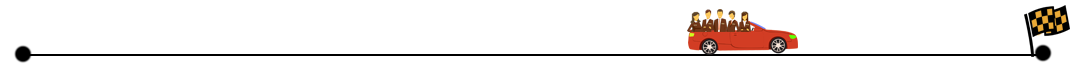

Random Forest is an ensemble machine learning technique capable of performing both regression and classification tasks using multiple decision trees. In other words, Random forest builds multiple decision trees and merge their predictions together to get a more accurate and stable prediction rather than relying on individual decision trees.

#### 6.1 Variable Importances

In order to quantify the usefulness of all the variables in the entire random forest, we can look at the relative importances of the variables. The importances returned in Skicit-learn represent how much including a particular variable improves the prediction.

In [42]:
X = cleaned_v2_df.drop(['Price',], axis = 1)
Y = cleaned_v2_df[['Price']]

X_train, X_test, y_train, y_test = split_dataset(cleaned_v2_df, X, Y) 
random_forest_model = RandomForestRegressor(n_estimators = 100, random_state = 0)
random_forest_model.fit(X_train, y_train.values.flatten())  

# Get numerical feature importances
importances = list(random_forest_model.feature_importances_)

# List of features for later use
X_list = list(X.columns)

# List of tuples with variable and importance
X_importances = [(feature, round(importance, 2)) for feature, importance in zip(X_list, importances)]

# Sort the feature importances by most important first
X_importances = sorted(X_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in X_importances];

Variable: Reservation Fee      Importance: 0.91
Variable: Floors Area          Importance: 0.05
Variable: Lot Area             Importance: 0.03
Variable: Bedrooms             Importance: 0.0
Variable: Bathrooms            Importance: 0.0
Variable: Floor                Importance: 0.0
Variable: Garage               Importance: 0.0
Variable: Location_Quezon City Importance: 0.0
Variable: Location_Pasig City  Importance: 0.0
Variable: Location_Muntinlupa City Importance: 0.0
Variable: Location_Marikina City Importance: 0.0
Variable: Location_Paranaque City Importance: 0.0
Variable: Location_Caloocan City Importance: 0.0
Variable: Location_Taguig City Importance: 0.0
Variable: Location_Manila City Importance: 0.0
Variable: Garden_yes           Importance: 0.0
Variable: Pet_Friendly_yes     Importance: 0.0


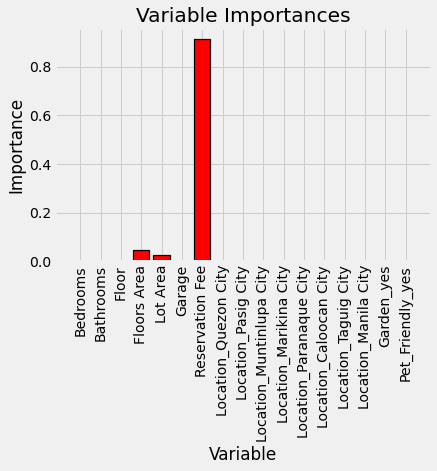

In [43]:
# Reset style 
plt.style.use('fivethirtyeight')

# list of x locations for plotting
x_values = list(range(len(importances)))

# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)

# Tick labels for x axis
plt.xticks(x_values, X_list, rotation='vertical')

# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

This graph tells us that we actually do not need all the independent variables that we collected to make accurate predictions in random forest regression. This implies we could only collect the two variables and achieve nearly the same performance.

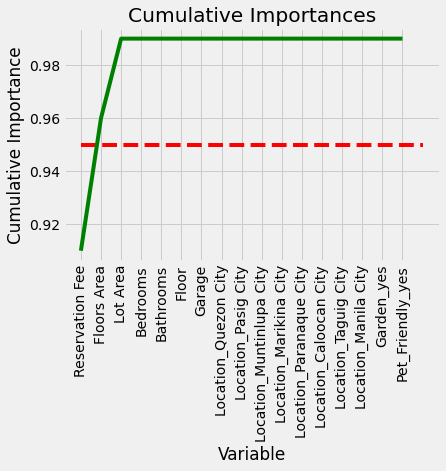

In [44]:
# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in X_importances]
sorted_features = [importance[0] for importance in X_importances]

# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)

# Make a line graph
plt.plot(x_values, cumulative_importances, 'g-')

# Draw line at 95% of importance retained
plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')

# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')

# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');

For this step, we will now reduce the number of dependent variables in use by the model to only those required to account for 95% of the importance. The same number of features must be used in the training and testing sets.

In [45]:
# Find number of features for cumulative importance of 95%
# Add 1 because Python is zero-indexed
print('Number of features for 95% importance:', np.where(cumulative_importances > 0.95)[0][0] + 1)

Number of features for 95% importance: 2


In [46]:
# Extract the names of the most important features
important_feature_names = [feature[0] for feature in X_importances[0:10]]
# Find the columns of the most important features
important_indices = [X_list.index(feature) for feature in important_feature_names]

# Create training and testing sets with only the important features
important_train_features = X_train.iloc[:, important_indices]
important_test_features = X_test.iloc[:, important_indices]

# Sanity check on operations
print('Important train features shape:', important_train_features.shape)
print('Important test features shape:', important_test_features.shape)

Important train features shape: (237, 10)
Important test features shape: (60, 10)


In [47]:
# Use only the most important features
X_train = important_train_features[:]
X_test = important_test_features[:]

# Update feature list for visualizations
feature_list = important_feature_names[:]

display(X_train.head(5))
display(X_test.head(5))

,Reservation Fee,Floors Area,Lot Area,Bedrooms,Bathrooms,Floor,Garage,Location_Quezon City,Location_Pasig City,Location_Muntinlupa City
128,5000000.0,75.0,82.0,3.0,2.0,2.0,1.0,0.0,0.0,0.0
352,0.0,76.0,96.0,3.0,2.0,2.0,1.0,0.0,0.0,0.0
63,30000.0,56.0,104.0,2.0,2.0,2.0,2.0,0.0,0.0,0.0
74,50000.0,140.0,84.0,4.0,3.0,2.0,1.0,0.0,1.0,0.0
174,50000.0,94.0,56.0,2.0,2.0,2.0,1.0,0.0,0.0,0.0


,Reservation Fee,Floors Area,Lot Area,Bedrooms,Bathrooms,Floor,Garage,Location_Quezon City,Location_Pasig City,Location_Muntinlupa City
273,0.0,88.0,44.0,3.0,2.0,2.0,1.0,0.0,0.0,0.0
150,50000.0,89.0,50.0,3.0,2.0,2.0,1.0,0.0,0.0,0.0
279,0.0,67.0,55.0,2.0,1.0,2.0,1.0,0.0,0.0,0.0
195,20000.0,53.0,50.0,2.0,2.0,2.0,1.0,0.0,0.0,0.0
286,30000.0,118.0,92.0,3.0,2.0,3.0,1.0,0.0,0.0,0.0


In [48]:
new_model = RandomForestRegressor(n_estimators = 1000, random_state = 42)
new_model.fit(X_train, y_train.values.flatten())

accuracy_train = get_accuracy_score(new_model, X_train, y_train)
accuracy_test = get_accuracy_score(new_model, X_test, y_test)

print('Accuracy Train: {0:.2f}%'.format(accuracy_train * 100))
print('Accuracy Test: {0:.2f}%'.format(accuracy_test * 100))

# Get random foreset predictions
y_predictions= get_predictions(new_model, X_test)

model_mse, model_mae, model_rmse = get_errors(y_test, y_predictions)

print("-"*100)
print("Mean Squared Error {0}".format(model_mse))
print("Mean Absolute Error {0}".format(model_mae))
print("Root Mean Squared Error {0}".format(model_rmse))

Accuracy Train: 99.43%
Accuracy Test: 93.43%
----------------------------------------------------------------------------------------------------
Mean Squared Error 178211262240.6722
Mean Absolute Error 257656.698087101
Root Mean Squared Error 422150.75771656766


<br>

### 7. Results and Key Findings
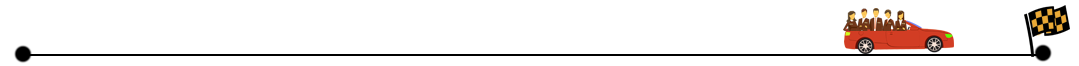

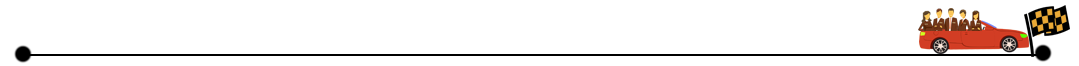